In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools

In [2]:
data = pd.read_excel('data/deception_IQ_data_anonymous.xlsx')

# Figure 2

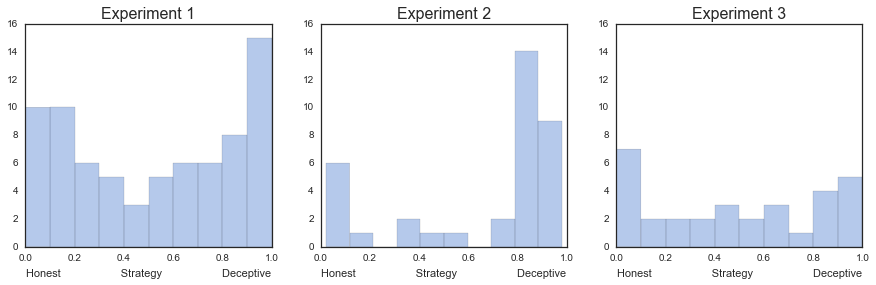

In [5]:
sns.set(style="white", palette="muted", color_codes=True)

fig = plt.figure(figsize = (15,4))

ax = fig.add_subplot(131)
sns.distplot(data.strategy[np.logical_and(data.study == 1, data.include == 1)], bins = 10, kde = False, ax = ax)
ax.set_title('Experiment 1', fontsize = 16)
ax.set_ylim((0,16))
ax.set_xlabel('Honest                    Strategy                    Deceptive')

ax = fig.add_subplot(132)
sns.distplot(data.strategy[np.logical_and(data.study == 2, data.include == 1)], bins = 10, kde = False, ax = ax)
ax.set_title('Experiment 2', fontsize = 16)
ax.set_ylim((0,16))
ax.set_xlabel('Honest                    Strategy                    Deceptive')

ax = fig.add_subplot(133)
sns.distplot(data.strategy[np.logical_and(data.study == 3, data.include == 1)], bins = 10, kde = False, ax = ax)
ax.set_title('Experiment 3', fontsize = 16)
ax.set_ylim((0,16))
ax.set_xlabel('Honest                    Strategy                    Deceptive')

fig.savefig('figures/Fig2.eps', dpi = 300)

# Figure 3
Here the parameter estimates are entered manually, because that's the easiest way.

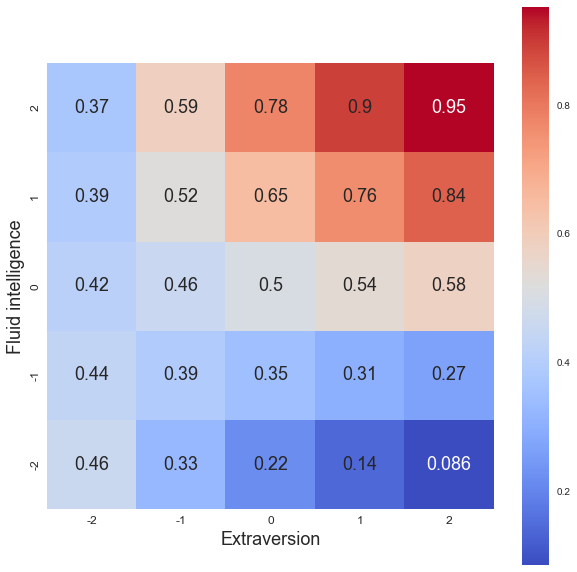

In [9]:
iq = np.arange(-2,3,1)
ex = np.arange(-2,3,1)

# enter parameter estimates (means of posterior distributions)
iq_p = 0.63
e_p = 0.17
iq_e_p = 0.36

predicted_odds = np.zeros(len(iq)*len(ex))
pairs = []

for i, element in enumerate(itertools.product(reversed(iq), ex)):
    pairs.append(element)
    predicted_odds[i] = element[0] * iq_p + element[1] * e_p + element[0] * element[1] * iq_e_p

predicted_odds = np.exp(predicted_odds)/(1+np.exp(predicted_odds))

predicted_prob = predicted_odds.reshape((len(iq),len(iq)))

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111)

sns.heatmap(predicted_prob, annot = True, cmap = 'coolwarm', square = True, 
            xticklabels= np.arange(-2,3,1), yticklabels=np.arange(-2,3,1)*-1, ax = ax,
           annot_kws = {'fontsize' : 18})
ax.set_xlabel('Extraversion', fontsize = 18)
ax.set_ylabel('Fluid intelligence', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=12)

#fig.savefig('Fig_IQ_Extroversion.png', dpi = 300)
fig.savefig('figures/Fig3.eps', dpi = 300)

# Figure S1

In [7]:
post_s1 = np.load('posteriors/main_s1.npy')
post_s2 = np.load('posteriors/main_s2.npy')
post_s3 = np.load('posteriors/main_s3.npy')

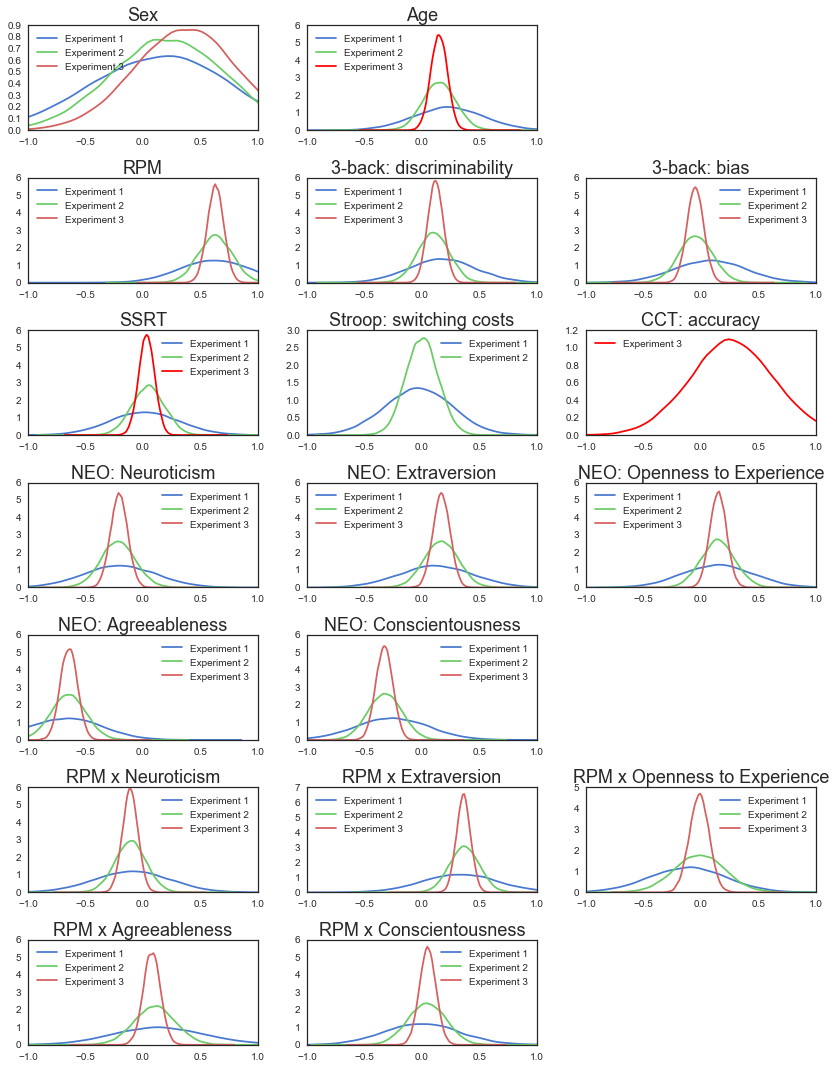

In [8]:

nrows = 7
ncols = 3

fig = plt.figure(figsize = (12,15))



ax = fig.add_subplot(nrows,ncols,1)

sns.kdeplot(post_s1[:,1], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,1], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,1], label = 'Experiment 3', ax = ax)

ax.set_title('Sex', fontsize = 18)
ax.set_xlim((-1, 1))



ax = fig.add_subplot(nrows,ncols,2)

sns.kdeplot(post_s1[:,2], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,2], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,2], label = 'Experiment 3', ax = ax, color = 'red')

ax.set_title('Age', fontsize = 18)
ax.set_xlim((-1, 1))



ax = fig.add_subplot(nrows,ncols,4)

sns.kdeplot(post_s1[:,3], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,3], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,3], label = 'Experiment 3', ax = ax)

ax.set_title('RPM', fontsize = 18)
ax.set_xlim((-1, 1))




ax = fig.add_subplot(nrows,ncols,5)

sns.kdeplot(post_s1[:,4], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,4], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,4], label = 'Experiment 3', ax = ax)

ax.set_title('3-back: discriminability', fontsize = 18)
ax.set_xlim((-1, 1))




ax = fig.add_subplot(nrows,ncols,6)

sns.kdeplot(post_s1[:,5], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,5], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,5], label = 'Experiment 3', ax = ax)

ax.set_title('3-back: bias', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,7)

sns.kdeplot(post_s1[:,6], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,6], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,6], label = 'Experiment 3', ax = ax, color = 'red')

ax.set_title('SSRT', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,8)

sns.kdeplot(post_s1[:,7], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,7], label = 'Experiment 2', ax = ax)

ax.set_title('Stroop: switching costs', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,9)

sns.kdeplot(post_s3[:,7], label = 'Experiment 3', ax = ax, color = 'red')

ax.set_title('CCT: accuracy', fontsize = 18)
ax.set_xlim((-1, 1))


ax = fig.add_subplot(nrows,ncols,10)

sns.kdeplot(post_s1[:,8], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,8], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,8], label = 'Experiment 3', ax = ax)

ax.set_title('NEO: Neuroticism', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,11)

sns.kdeplot(post_s1[:,9], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,9], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,9], label = 'Experiment 3', ax = ax)

ax.set_title('NEO: Extraversion', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,12)

sns.kdeplot(post_s1[:,10], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,10], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,10], label = 'Experiment 3', ax = ax)

ax.set_title('NEO: Openness to Experience', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,13)

sns.kdeplot(post_s1[:,11], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,11], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,11], label = 'Experiment 3', ax = ax)

ax.set_title('NEO: Agreeableness', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,14)

sns.kdeplot(post_s1[:,12], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,12], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,12], label = 'Experiment 3', ax = ax)

ax.set_title('NEO: Conscientousness', fontsize = 18)
ax.set_xlim((-1, 1))

ax = fig.add_subplot(nrows,ncols,16)

sns.kdeplot(post_s1[:,13], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,13], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,13], label = 'Experiment 3', ax = ax)

ax.set_title('RPM x Neuroticism', fontsize = 18)
ax.set_xlim((-1, 1))


ax = fig.add_subplot(nrows,ncols,17)

sns.kdeplot(post_s1[:,14], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,14], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,14], label = 'Experiment 3', ax = ax)

ax.set_title('RPM x Extraversion', fontsize = 18)
ax.set_xlim((-1, 1))


ax = fig.add_subplot(nrows,ncols,18)

sns.kdeplot(post_s1[:,15], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,15], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,15], label = 'Experiment 3', ax = ax)

ax.set_title('RPM x Openness to Experience', fontsize = 18)
ax.set_xlim((-1, 1))


ax = fig.add_subplot(nrows,ncols,19)

sns.kdeplot(post_s1[:,16], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,16], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,16], label = 'Experiment 3', ax = ax)

ax.set_title('RPM x Agreeableness', fontsize = 18)
ax.set_xlim((-1, 1))



ax = fig.add_subplot(nrows,ncols,20)

sns.kdeplot(post_s1[:,17], label = 'Experiment 1', ax = ax)
sns.kdeplot(post_s2[:,17], label = 'Experiment 2', ax = ax)
sns.kdeplot(post_s3[:,17], label = 'Experiment 3', ax = ax)

ax.set_title('RPM x Conscientousness', fontsize = 18)
ax.set_xlim((-1, 1))

fig.tight_layout()

fig.savefig('figures/FigS1.eps', dpi = 300)